## A notebook to create a bar graph of CTs inside AS

## Install and import libraries

In [112]:

%pip install pandas seaborn numpy requests matplotlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import requests
from  io import StringIO
import textwrap
from pprint import pprint
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Global settings

In [113]:
hra_pop_version = 'v1.0'
branch = 'main'

output_folder = 'output/ctBar3dAs'

## Load data

In [114]:
# could also use https://apps.humanatlas.io/api/grlc/hra-pop.html#get-/cell-types-in-atlas
url = f"https://raw.githubusercontent.com/x-atlas-consortia/hra-pop/refs/heads/{branch}/output-data/{hra_pop_version}/reports/atlas-ad-hoc/cell-types-in-anatomical-structurescts-per-as.csv"

headers = {
  'Accept' :'text/csv'
  }

data = requests.get(url=url, headers=headers).text

df = pd.read_csv(StringIO(data))
df

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count
0,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_colonocyte,Colonocyte,1.205,0.147653,3
1,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_iga-plasma-cell,IgA plasma cell,1.182,0.144835,3
2,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_best4-epithelial,BEST4+ epithelial,0.699,0.085651,3
3,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_activated-cd4-t,Activated CD4 T,0.690,0.084548,3
4,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_ta,TA,0.540,0.066168,3
...,...,...,...,...,...,...,...,...,...,...,...
8891,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_0000097,Mast Cell,15322.464,0.024702,1
8892,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_4033039,CD8+ T Cell,3691.176,0.005951,1
8893,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...,Lymphatic Endothelial (and some immune cells),1753.956,0.002828,1
8894,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...,Basal Epithelial Cell,970.104,0.001564,1


## Preprocess using `cell-types-level-mapping.csv`

In [115]:
# walk up CTs
csv_response = requests.get(
    f'https://raw.githubusercontent.com/x-atlas-consortia/hra-pop/refs/heads/{branch}/output-data/{hra_pop_version}/reports/atlas-ad-hoc/cell-types-level-mapping.csv', headers={'accept': 'text/csv'}).text

look_up = pd.read_csv(StringIO(csv_response))

look_up

,cell_label,cell_id,level_1_cell_id,level_1_cell_label,level_2_cell_id,level_2_cell_label
0,cell,http://purl.obolibrary.org/obo/CL_0000000,http://purl.obolibrary.org/obo/CL_0000000,no mapped parent cell,http://purl.obolibrary.org/obo/CL_0000000,no mapped parent cell
1,hematopoietic stem cell,http://purl.obolibrary.org/obo/CL_0000037,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell
2,fibroblast,http://purl.obolibrary.org/obo/CL_0000057,http://purl.obolibrary.org/obo/CL_0002320,connective tissue cell,http://purl.obolibrary.org/obo/CL_0002320,connective tissue cell
3,epithelial cell,http://purl.obolibrary.org/obo/CL_0000066,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
4,blood vessel endothelial cell,http://purl.obolibrary.org/obo/CL_0000071,http://purl.obolibrary.org/obo/CL_0000115,endothelial cell,http://purl.obolibrary.org/obo/CL_0000115,endothelial cell
...,...,...,...,...,...,...
196,lung migratory dendritic cell,http://purl.obolibrary.org/obo/CL_4033045,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell
197,respiratory tract suprabasal cell,http://purl.obolibrary.org/obo/CL_4033048,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
198,cycling macrophage,http://purl.obolibrary.org/obo/CL_4033076,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell
199,cycling alveolar macrophage,http://purl.obolibrary.org/obo/CL_4033077,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell


In [116]:
df_temp = df
df_temp

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count
0,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_colonocyte,Colonocyte,1.205,0.147653,3
1,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_iga-plasma-cell,IgA plasma cell,1.182,0.144835,3
2,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_best4-epithelial,BEST4+ epithelial,0.699,0.085651,3
3,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_activated-cd4-t,Activated CD4 T,0.690,0.084548,3
4,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_ta,TA,0.540,0.066168,3
...,...,...,...,...,...,...,...,...,...,...,...
8891,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_0000097,Mast Cell,15322.464,0.024702,1
8892,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_4033039,CD8+ T Cell,3691.176,0.005951,1
8893,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...,Lymphatic Endothelial (and some immune cells),1753.956,0.002828,1
8894,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...,Basal Epithelial Cell,970.104,0.001564,1


In [117]:
# Merge look-up df with df
df_temp = df.merge(
    look_up[['cell_id','level_1_cell_id','level_1_cell_label']],
    left_on='cell_id',  # Column in main df
    right_on='cell_id',  # Column in lookup df
    how='left'      # Keep all rows from main df
)


df_temp

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,level_1_cell_id,level_1_cell_label
0,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_colonocyte,Colonocyte,1.205,0.147653,3,NaN,NaN
1,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_iga-plasma-cell,IgA plasma cell,1.182,0.144835,3,NaN,NaN
2,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_best4-epithelial,BEST4+ epithelial,0.699,0.085651,3,NaN,NaN
3,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_activated-cd4-t,Activated CD4 T,0.690,0.084548,3,NaN,NaN
4,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_ta,TA,0.540,0.066168,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8891,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_0000097,Mast Cell,15322.464,0.024702,1,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell
8892,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_4033039,CD8+ T Cell,3691.176,0.005951,1,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell
8893,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...,Lymphatic Endothelial (and some immune cells),1753.956,0.002828,1,NaN,NaN
8894,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...,Basal Epithelial Cell,970.104,0.001564,1,NaN,NaN


In [122]:
look_up = {
    'L cells (PYY+)':{
        'id': 'CL:0002279',
      'label': 'type L enteroendocrine cell'
      },
    'Colonocyte':{
      'id':'CL:1000347',
      'label': 'colonocyte'
    }
}

In [121]:
df_temp

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,level_1_cell_id,level_1_cell_label
0,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_colonocyte,Colonocyte,1.205,0.147653,3,NaN,NaN
1,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_iga-plasma-cell,IgA plasma cell,1.182,0.144835,3,NaN,NaN
2,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_best4-epithelial,BEST4+ epithelial,0.699,0.085651,3,NaN,NaN
3,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_activated-cd4-t,Activated CD4 T,0.690,0.084548,3,NaN,NaN
4,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_ta,TA,0.540,0.066168,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8891,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_0000097,Mast Cell,15322.464,0.024702,1,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell
8892,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_4033039,CD8+ T Cell,3691.176,0.005951,1,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell
8893,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...,Lymphatic Endothelial (and some immune cells),1753.956,0.002828,1,NaN,NaN
8894,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...,Basal Epithelial Cell,970.104,0.001564,1,NaN,NaN


In [123]:
for key, value in look_up.items():
  # df_temp.loc[df_temp['cell_id'] == key, 'cell_id'] = value['id']
  df_temp.loc[df_temp['cell_label'] == key, 'cell_label'] = value['label']
    
df_temp

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,level_1_cell_id,level_1_cell_label
0,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_colonocyte,colonocyte,1.205,0.147653,3,NaN,NaN
1,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_iga-plasma-cell,IgA plasma cell,1.182,0.144835,3,NaN,NaN
2,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_best4-epithelial,BEST4+ epithelial,0.699,0.085651,3,NaN,NaN
3,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_activated-cd4-t,Activated CD4 T,0.690,0.084548,3,NaN,NaN
4,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_ta,TA,0.540,0.066168,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8891,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_0000097,Mast Cell,15322.464,0.024702,1,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell
8892,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_4033039,CD8+ T Cell,3691.176,0.005951,1,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell
8893,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...,Lymphatic Endothelial (and some immune cells),1753.956,0.002828,1,NaN,NaN
8894,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...,Basal Epithelial Cell,970.104,0.001564,1,NaN,NaN


In [28]:
# show unknown cell IDs
# see also https://github.com/x-atlas-consortia/hra-pop/blob/v0.12.0/output-data/v0.12.0/reports/atlas-ad-hoc/unmapped-cell-ids.csv
unmapped = df_temp[df_temp['level_1_cell_id'].isna()][['organ', 'as_label', 'tool', 'cell_id','cell_label','level_1_cell_id','level_1_cell_label']]
unmapped

,organ,as_label,tool,cell_id,cell_label,level_1_cell_id,level_1_cell_label
0,large intestine,rectum,celltypist,https://purl.org/ccf/ASCTB-TEMP_colonocyte,Colonocyte,NaN,NaN
1,large intestine,rectum,celltypist,https://purl.org/ccf/ASCTB-TEMP_iga-plasma-cell,IgA plasma cell,NaN,NaN
2,large intestine,rectum,celltypist,https://purl.org/ccf/ASCTB-TEMP_best4-epithelial,BEST4+ epithelial,NaN,NaN
3,large intestine,rectum,celltypist,https://purl.org/ccf/ASCTB-TEMP_activated-cd4-t,Activated CD4 T,NaN,NaN
4,large intestine,rectum,celltypist,https://purl.org/ccf/ASCTB-TEMP_ta,TA,NaN,NaN
...,...,...,...,...,...,...,...
8885,lung,Left posterior basal segmental bronchus,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_mpo-,MPO+,NaN,NaN
8887,lung,Left posterior basal segmental bronchus,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_cd68-macrophage,CD68+ Macrophage,NaN,NaN
8889,lung,Left posterior basal segmental bronchus,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_smooth-muscle-...,Smooth Muscle Cell,NaN,NaN
8893,lung,Left posterior basal segmental bronchus,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...,Lymphatic Endothelial (and some immune cells),NaN,NaN


In [29]:
print(f'Number of unmapped IDs: {unmapped['cell_id'].nunique()}')

Number of unmapped IDs: 189


In [30]:
# handle missing values
df_temp['level_1_cell_id'] = df_temp['level_1_cell_id'].fillna('Not crosswalked')
df_temp['level_1_cell_label'] = df_temp['level_1_cell_label'].fillna('Not crosswalked')

In [31]:
df = df_temp

df

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,level_1_cell_id,level_1_cell_label
0,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_colonocyte,Colonocyte,1.205,0.147653,3,Not crosswalked,Not crosswalked
1,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_iga-plasma-cell,IgA plasma cell,1.182,0.144835,3,Not crosswalked,Not crosswalked
2,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_best4-epithelial,BEST4+ epithelial,0.699,0.085651,3,Not crosswalked,Not crosswalked
3,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_activated-cd4-t,Activated CD4 T,0.690,0.084548,3,Not crosswalked,Not crosswalked
4,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_ta,TA,0.540,0.066168,3,Not crosswalked,Not crosswalked
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8891,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_0000097,Mast Cell,15322.464,0.024702,1,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell
8892,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_4033039,CD8+ T Cell,3691.176,0.005951,1,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell
8893,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...,Lymphatic Endothelial (and some immune cells),1753.956,0.002828,1,Not crosswalked,Not crosswalked
8894,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...,Basal Epithelial Cell,970.104,0.001564,1,Not crosswalked,Not crosswalked


In [32]:
# filter by tool (azimuth, then celltypist, then popv)
# Function to determine if a row should be kept based on conditions
def filter_rows(df):
    # Step 1: Group by `sex`, `as_label`, and `modality`
    groups = df.groupby(['organ','sex', 'as_label', 'modality'])

    # Step 2: Initialize a list to store the rows to keep
    rows_to_keep = []

    # Step 3: Loop through each group
    for _, group in groups:      
        # If 'azimuth' exists in the group, keep only those rows
        if 'azimuth' in group['tool'].values:
            rows_to_keep.append(group[group['tool'] == 'azimuth'])
        # If no 'azimuth' but 'cell_typist' exists, keep 'cell_typist'
        elif 'celltypist' in group['tool'].values:
            rows_to_keep.append(group[group['tool'] == 'celltypist'])
        # If neither 'azimuth' nor 'cell_typist' exist, keep 'popv'
        elif 'popv' in group['tool'].values:
            rows_to_keep.append(group[group['tool'] == 'popv'])

    # Combine all the rows to keep
    df_filtered = pd.concat(rows_to_keep)
    return df_filtered


# Apply the filtering function
no_proteomics = df[df['tool'] != 'sc_proteomics']
df_filtered = filter_rows(no_proteomics)

# Display the filtered DataFrame
df_filtered

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,level_1_cell_id,level_1_cell_label
1304,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000718,Inner Medullary Collecting Duct,10748.474,0.216025,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
1306,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030016,Distal Convoluted Tubule Type 1,6735.132,0.135364,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
1308,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1001108,Medullary Thick Ascending Limb,3580.251,0.071957,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
1310,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000768,Connecting Tubule,3390.010,0.068133,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
1312,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1001107,Ascending Thin Limb,3128.057,0.062868,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5213,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000814,mature NK T cell,60.768,0.001877,4,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell
5214,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002138,endothelial cell of lymphatic vessel,47.393,0.001464,4,http://purl.obolibrary.org/obo/CL_0000115,endothelial cell
5215,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000084,T cell,29.786,0.000920,4,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell
5216,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000236,B cell,24.758,0.000765,4,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell


## Visualize

### Create new labels in the format `{organ}-{as_label}` and show at most `n_max` characters

In [64]:
# set max. chars
n_max = 40

# create new labels with organ and as_label so y-axis is sorted and grouped by organ
df_filtered['organ_as_label'] = (df_filtered['organ']+" - "+df_filtered['as_label']).str[:n_max]+'...'
df_filtered

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,level_1_cell_id,level_1_cell_label,organ_as_label
1304,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000718,Inner Medullary Collecting Duct,10748.474,0.216025,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule...
1306,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030016,Distal Convoluted Tubule Type 1,6735.132,0.135364,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule...
1308,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1001108,Medullary Thick Ascending Limb,3580.251,0.071957,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule...
1310,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000768,Connecting Tubule,3390.010,0.068133,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule...
1312,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1001107,Ascending Thin Limb,3128.057,0.062868,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5213,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000814,mature NK T cell,60.768,0.001877,4,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell,urinary bladder - trigone of urinary bla...
5214,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002138,endothelial cell of lymphatic vessel,47.393,0.001464,4,http://purl.obolibrary.org/obo/CL_0000115,endothelial cell,urinary bladder - trigone of urinary bla...
5215,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000084,T cell,29.786,0.000920,4,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell,urinary bladder - trigone of urinary bla...
5216,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000236,B cell,24.758,0.000765,4,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell,urinary bladder - trigone of urinary bla...


### Get colors from Color Brewer

In [65]:
def create_consistent_color_mapping(df, colors_file_path):
    # Get all unique cell types from the entire dataset
    all_cell_types = df['level_1_cell_label'].unique()

    # Read colors from the text file
    with open(colors_file_path, 'r') as file:
        # Assuming each line in the file contains one color code
        colors = [line.strip() for line in file.readlines()]

    # Create color dictionary
    color_map = {}
    for i, cell_type in enumerate(all_cell_types):
        # Cycle through colors if more than available
        color_idx = i % len(colors)
        color_map[cell_type] = colors[color_idx]
    pprint(color_map)
    return color_map

In [66]:
# Read colors from file
with open('data/colors.txt', 'r') as file:
    colors = [line.strip() for line in file.readlines()]

# Create color mapping using function defined above
color_map = create_consistent_color_mapping(df, "data/colors.txt")

{'Not crosswalked': '#a6cee3',
 'connective tissue cell': '#33a02c',
 'endothelial cell': '#fb9a99',
 'epithelial cell': '#1f78b4',
 'hematopoietic cell': '#b2df8a',
 'melanocyte': '#6a3d9a',
 'muscle cell': '#e31a1c',
 'neural cell': '#ff7f00',
 'no mapped parent cell': '#fdbf6f',
 'stem cell': '#cab2d6'}


### Build visualizations

In [67]:
def wrap_labels(ax, width, axis='y', break_long_words=False):
  """Wraps the labels of the specified axis to a maximum width.

  Args:
      ax (matplotlib.axes.Axes): The axes object.
      width (int): The maximum width of the labels.
      axis (str, optional): The axis to wrap ('x' or 'y'). Defaults to 'y'.
      break_long_words (bool, optional): Whether to break words longer than
                                        the width. Defaults to False.
  """
  if axis == 'y':
      labels = []
      for label in ax.get_yticklabels():
          text = label.get_text()
          labels.append(textwrap.fill(text, width=width,
                        break_long_words=break_long_words))
      ax.set_yticklabels(labels, rotation=0)
  elif axis == 'x':
      labels = []
      for label in ax.get_xticklabels():
            text = label.get_text()
            labels.append(textwrap.fill(text, width=width,
                          break_long_words=break_long_words))
      ax.set_xticklabels(labels, rotation=0)

In [68]:
# Set the figure size globally
sns.set_theme(rc={'figure.figsize': (20, 65)})

In [69]:
def build_stacked_bar_graph(sex: str, df: pd.DataFrame, color_map: dict, swap_labels: bool):
    """Build a stacked horizontal bar graph for a given sex using cell type colors."""

    # Set Seaborn theme and figure size globally
    sns.set_theme(rc={
        'figure.figsize': (15, 65),
        "axes.labelsize": 40,
        "xtick.labelsize": 55,
        "ytick.labelsize": 55,
        "legend.fontsize": 12,
        "legend.title_fontsize": 12
    })

    # Filter data by sex
    df_sex = df[df['sex'] == sex]

    # Group and pivot data
    grouped = df_sex.groupby(['organ_as_label', 'level_1_cell_label'])[
        'cell_percentage'].sum().reset_index()
    pivot_df = grouped.pivot(
        index='organ_as_label', columns='level_1_cell_label', values='cell_percentage').fillna(0)

    # Sort index if needed
    pivot_df = pivot_df.sort_index()

    # Plotting
    fig, ax = plt.subplots()  # Use Seaborn's default figsize set above
    bar_height = 0.3
    y_positions = np.arange(len(pivot_df))
    bottom = np.zeros(len(pivot_df))

    # Stacked horizontal bars
    for col in pivot_df.columns:
        values = pivot_df[col].values
        ax.barh(y_positions, values, left=bottom, height=bar_height,
                label=col, color=color_map.get(col, 'gray'))
        bottom += values

    # Y-axis labels
    ax.set_yticks(y_positions)
    ax.set_yticklabels(pivot_df.index)

    # X-axis formatting
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])

    # Minor ticks and tick marks
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(ticker.FixedLocator([0, 0.25, 0.5, 0.75, 1.0]))
    ax.tick_params(axis='x', which='major', length=10, width=2)
    ax.tick_params(axis='x', which='minor', length=5, width=1, color='gray')

    # Grid lines
    ax.grid(axis='x', linestyle='--', alpha=0.5)

    # Remove legend (or show if needed)
    # ax.legend().remove()
    
    # Create legend for the main plot
    main_legend = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

    # Also save legend-only version
    fig_legend, ax_legend = plt.subplots(figsize=(8, 6))
    patches = [mpatches.Patch(color=color_map.get(col, 'gray'), label=col) 
              for col in pivot_df.columns]
    ax_legend.legend(handles=patches, loc='center', frameon=True, fontsize=12, ncol=1)
    ax_legend.axis('off')
    fig_legend.patch.set_facecolor('white')
    fig_legend.savefig(f"output/legend_only_{sex}.png", dpi=600, format='png', 
                      bbox_inches='tight', facecolor='white')
    plt.close(fig_legend) 
    
    # Remove legend (or show if needed)
    ax.legend().remove()

    # Tweak label spacing
    for label in ax.get_yticklabels():
        label.set_linespacing(1)

    # Ensure tick marks are visible
    ax.spines['top'].set_visible(True)
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_position('bottom')

    # White background
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    
    buffer = 0.1  # tiny space below bottom bar
    ax.set_ylim(-0.5 - buffer, len(pivot_df) - 0.5 + bar_height)
    
    # swap labels and bars if needed
    if swap_labels:
      ax.yaxis.tick_right()       # move y-axis ticks & labels to right side
      # move y-axis label to right
      ax.yaxis.set_label_position("right")
      # After plotting your graph and setting y-ticks and labels
      ax.tick_params(axis='y', length=0)  # hides y-axis tick marks only

    # Uncomment to save and display,
    plt.savefig(f"output/stacked_bar_graph_{sex}.png",
                dpi=600, format='png', bbox_inches='tight')
    plt.show()
    plt.close()

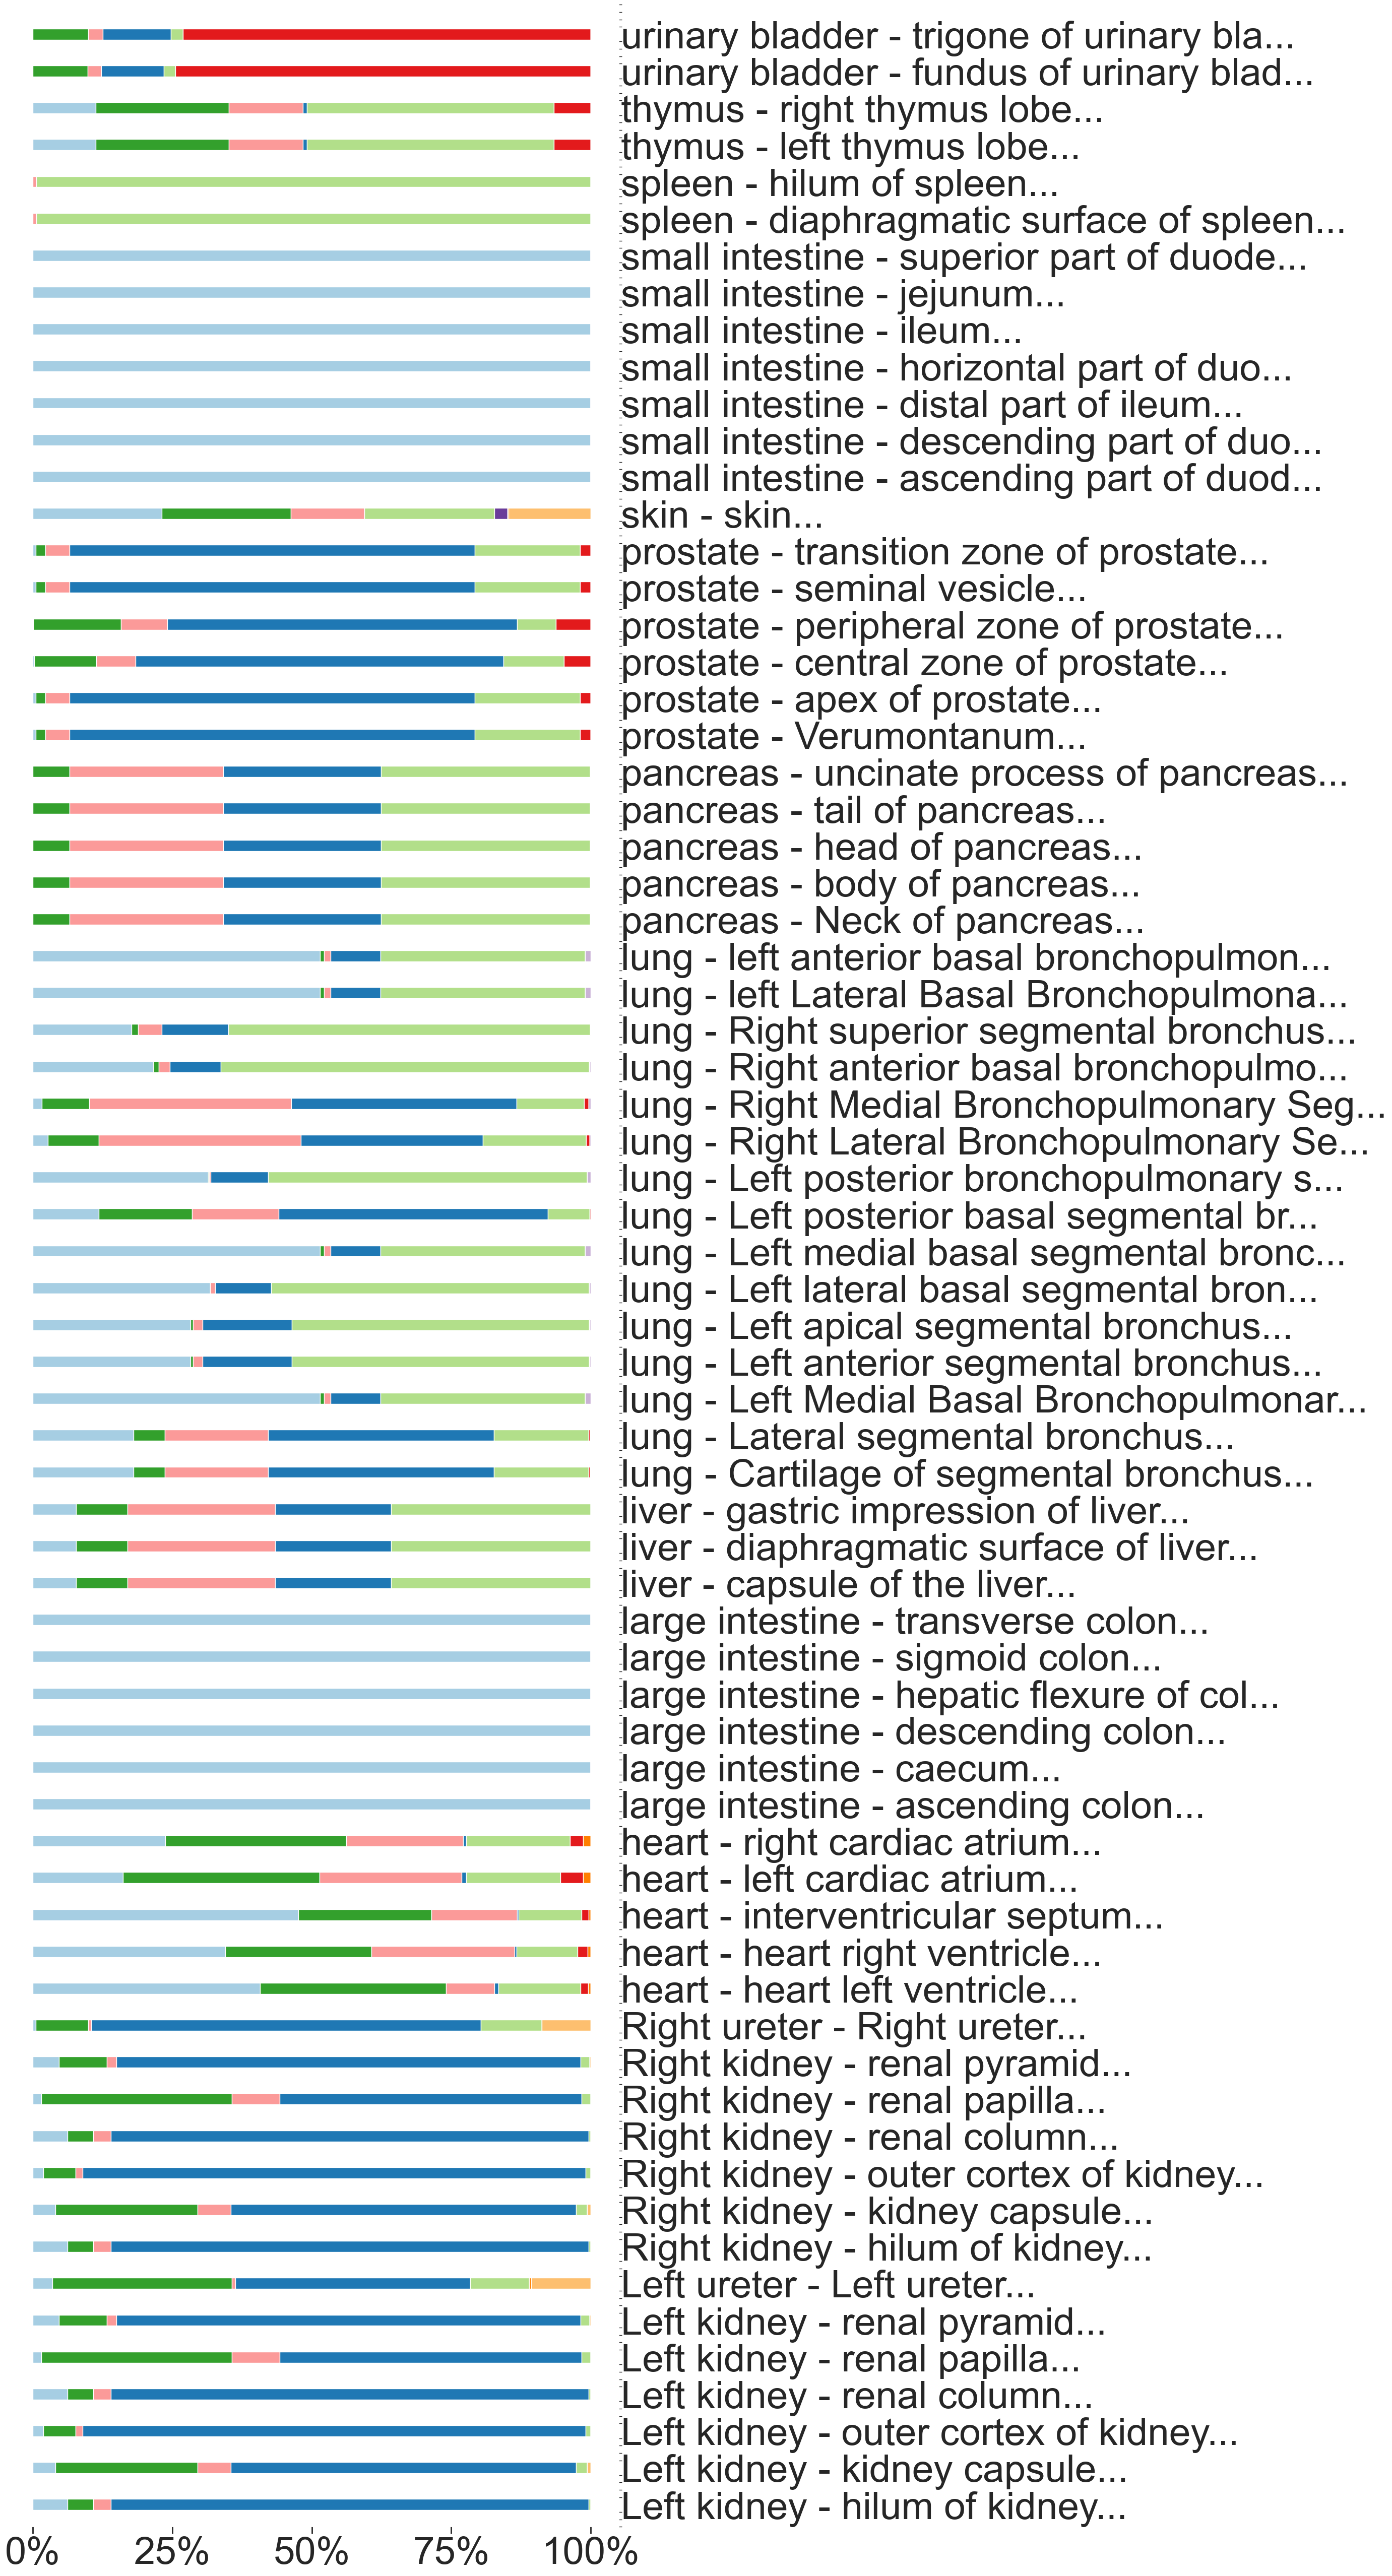

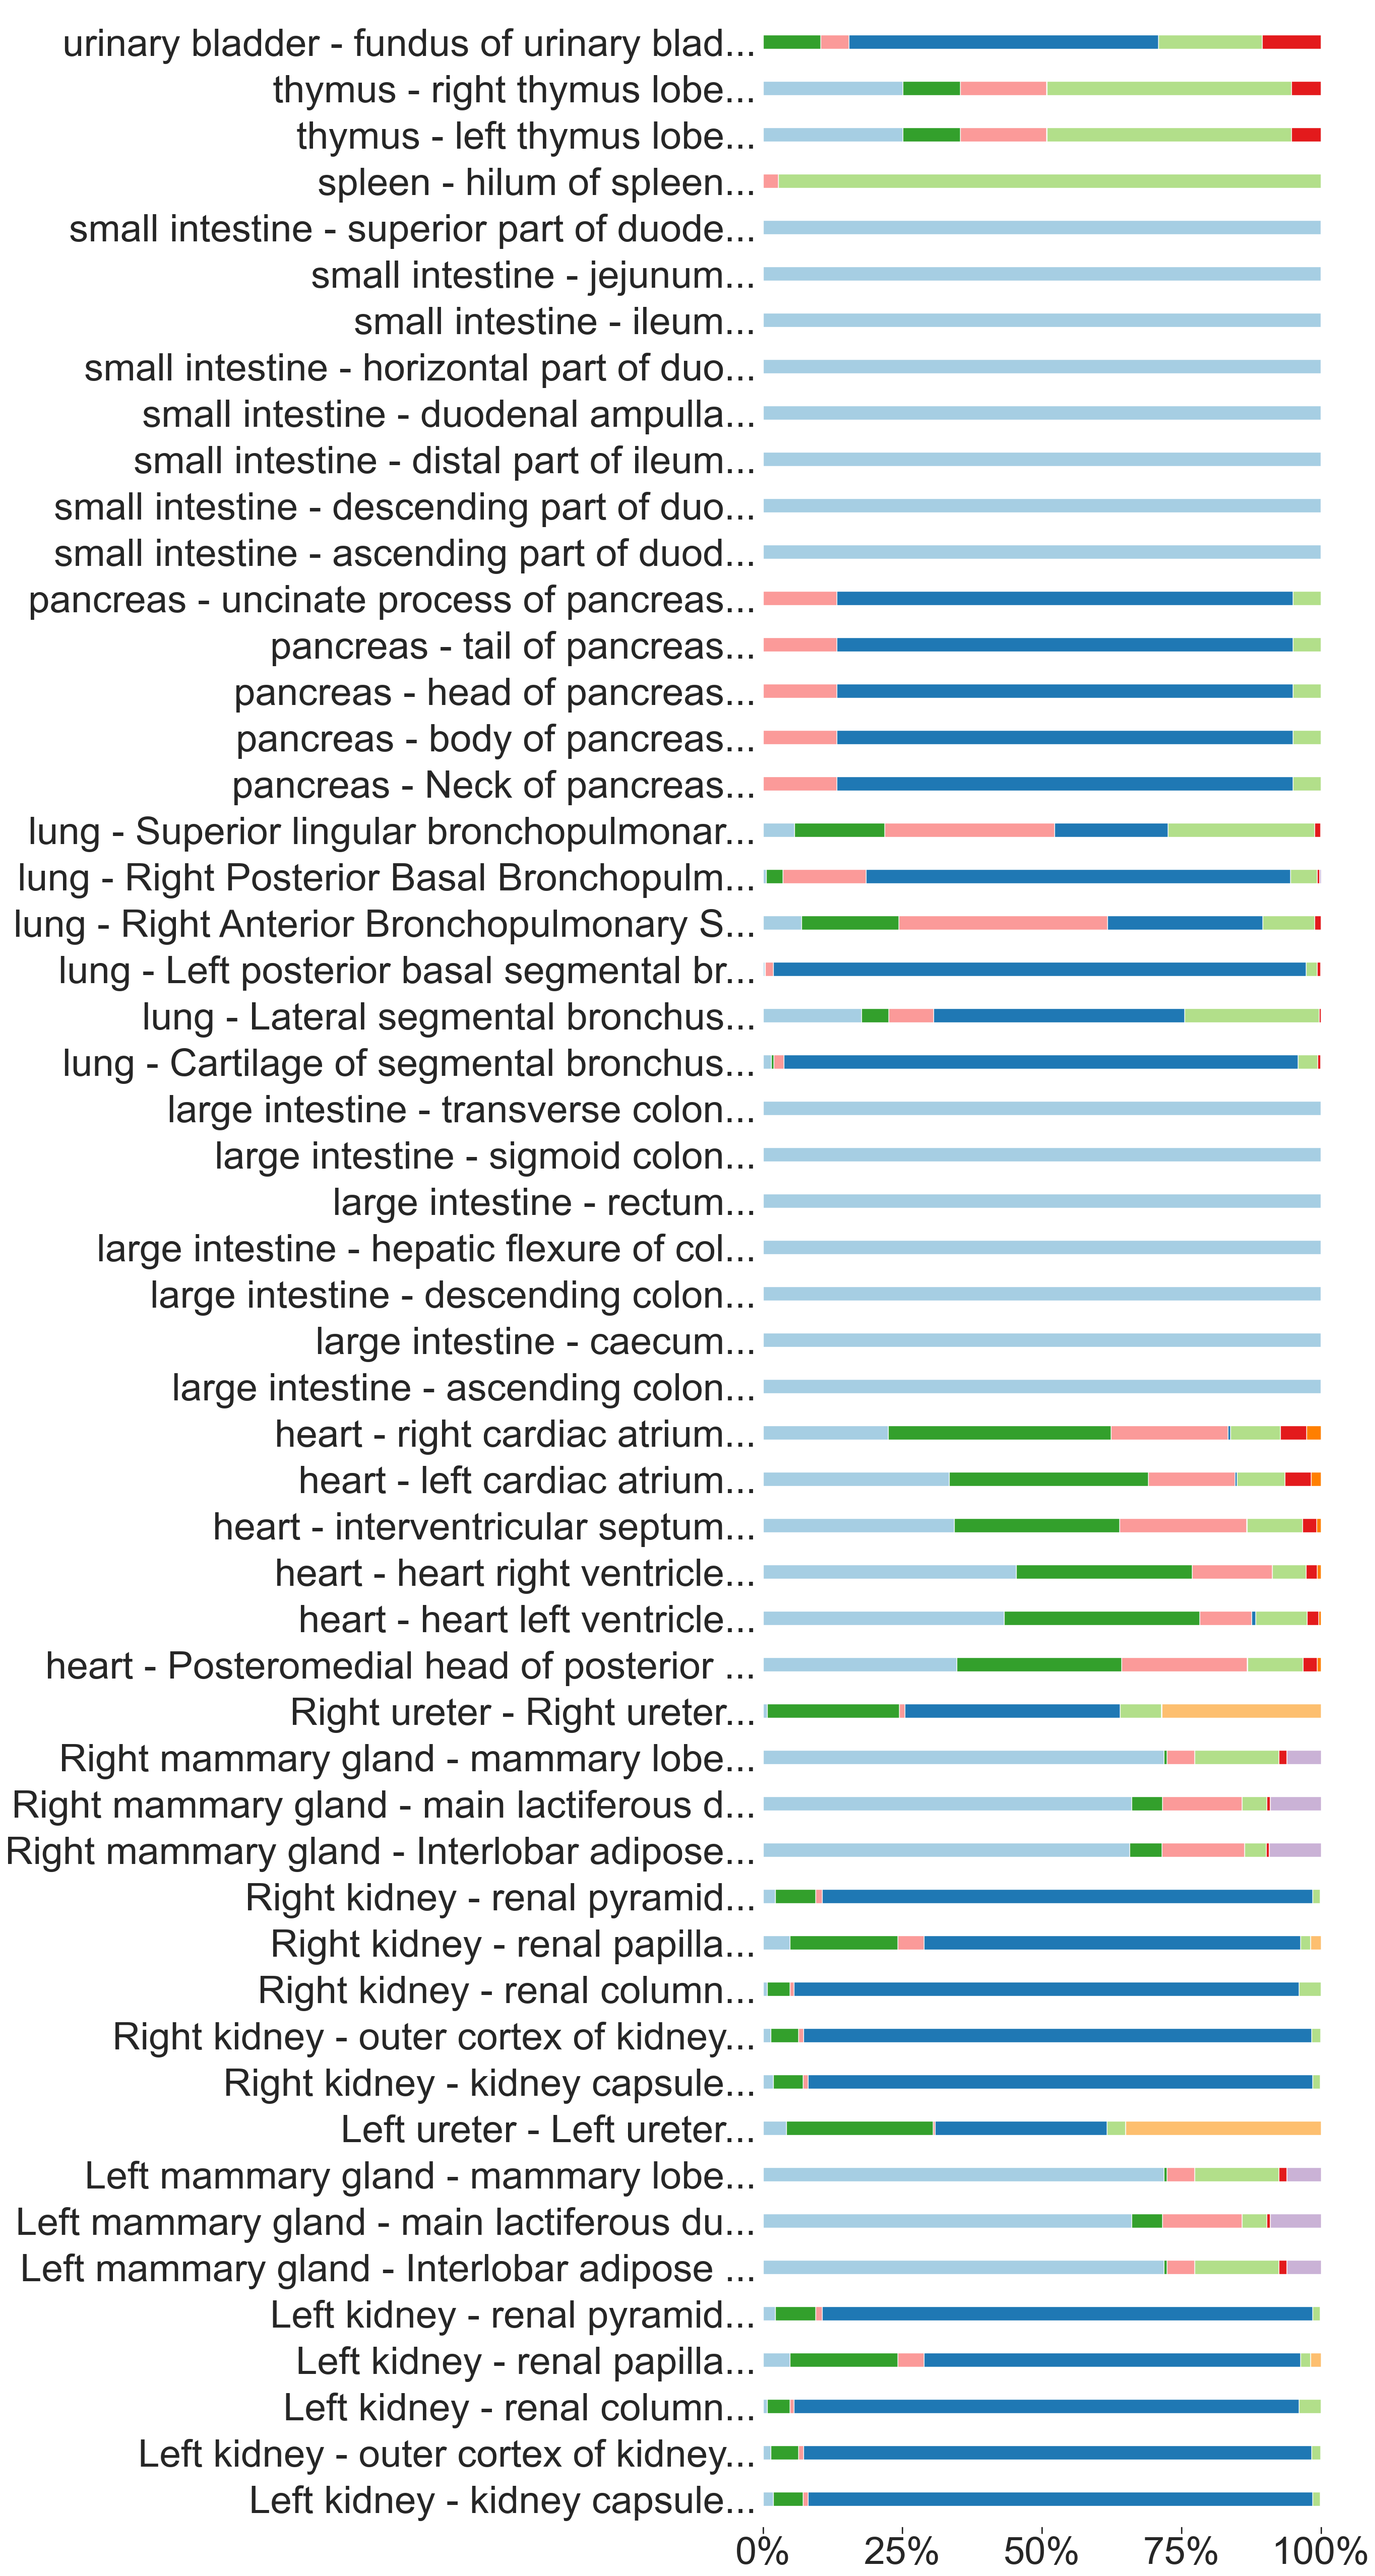

In [70]:
# build visualization
build_stacked_bar_graph('Male', df_filtered, color_map, True)
build_stacked_bar_graph('Female', df_filtered, color_map, False)



## Make look-up for `as_label` to `node_name`

In [71]:
url = 'https://cdn.humanatlas.io/digital-objects/ref-organ/asct-b-3d-models-crosswalk/v1.7/assets/asct-b-3d-models-crosswalk.csv'
df_crosswalk = pd.read_csv(url, skiprows=10)
df_crosswalk

,anatomical_structure_of,source_spatial_entity,node_name,label,OntologyID,representation_of,node_type,glb file of single organs,Ref/1,Ref/1/ID
0,-,#VHFemaleOrgans,VH_F_integumentary_system,integumentary system layer,UBERON:0013754,http://purl.obolibrary.org/obo/UBERON_0013754,organizational,3d-vh-f-united,NaN,NaN
1,#VHFSkinV1.1,#VHFemaleOrgans,VH_F_skin,skin of body,UBERON:0002097,http://purl.obolibrary.org/obo/UBERON_0002097,mesh,3d-vh-f-skin,NaN,NaN
2,-,-,VH_F_mammary_gland,-,-,-,organizational,-,NaN,NaN
3,#VHFLeftMammaryGland,#VHFemaleOrgans,VH_F_mammary_gland_L,Left mammary gland,FMA:57991,http://purl.org/sig/ont/fma/fma57991,organizational,3d-vh-f-mammary-gland-l,NaN,NaN
4,#VHFLeftMammaryGland,#VHFemaleOrgans,VH_F_fat_L,Interlobar adipose tissue of left mammary gland,FMA:73166,http://purl.org/sig/ont/fma/fma73166,mesh,3d-vh-f-mammary-gland-l,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2108,#VHMVertebrae,#VHMaleOrgans,VH_M_lumbar_vertebra_1,lumbar vertebra 1,UBERON:0004617,http://purl.obolibrary.org/obo/UBERON_0004617,mesh,VH_M_Vertebrae,NaN,NaN
2109,#VHMVertebrae,#VHMaleOrgans,VH_M_lumbar_vertebra_2,lumbar vertebra 2,UBERON:0004618,http://purl.obolibrary.org/obo/UBERON_0004618,mesh,VH_M_Vertebrae,NaN,NaN
2110,#VHMVertebrae,#VHMaleOrgans,VH_M_lumbar_vertebra_3,lumbar vertebra 3,UBERON:0004619,http://purl.obolibrary.org/obo/UBERON_0004619,mesh,VH_M_Vertebrae,NaN,NaN
2111,#VHMVertebrae,#VHMaleOrgans,VH_M_lumbar_vertebra_4,lumbar vertebra 4,UBERON:0004620,http://purl.obolibrary.org/obo/UBERON_0004620,mesh,VH_M_Vertebrae,NaN,NaN


In [72]:
# only keep relevant rows
df_filtered

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,level_1_cell_id,level_1_cell_label,organ_as_label
1304,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000718,Inner Medullary Collecting Duct,10748.474,0.216025,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule...
1306,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030016,Distal Convoluted Tubule Type 1,6735.132,0.135364,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule...
1308,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1001108,Medullary Thick Ascending Limb,3580.251,0.071957,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule...
1310,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000768,Connecting Tubule,3390.010,0.068133,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule...
1312,Left kidney,http://purl.obolibrary.org/obo/UBERON_0002015,kidney capsule,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1001107,Ascending Thin Limb,3128.057,0.062868,5,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney - kidney capsule...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5213,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000814,mature NK T cell,60.768,0.001877,4,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell,urinary bladder - trigone of urinary bla...
5214,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002138,endothelial cell of lymphatic vessel,47.393,0.001464,4,http://purl.obolibrary.org/obo/CL_0000115,endothelial cell,urinary bladder - trigone of urinary bla...
5215,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000084,T cell,29.786,0.000920,4,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell,urinary bladder - trigone of urinary bla...
5216,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000236,B cell,24.758,0.000765,4,http://purl.obolibrary.org/obo/CL_0000988,hematopoietic cell,urinary bladder - trigone of urinary bla...


In [73]:
# export relevant columns
subset = df_crosswalk[['label', 'node_name', 'anatomical_structure_of']]
export = subset[subset['label'].isin(df_filtered['as_label'])]
export.to_csv('output/ctBar3dAs/crosswalk.csv', index=False)